In [1]:
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
file = gzip.open('goemotions.json.gz')
json_file = json.load(file)

In [3]:
emotions = np.array([])
sentiments = np.array([])
posts = np.array([1])
json_file = np.asarray(json_file)

posts = json_file[:,0]
emotions = json_file[:,1]
sentiments = json_file[:,2]

/home/n_thekie/Desktop/school/comp 472/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


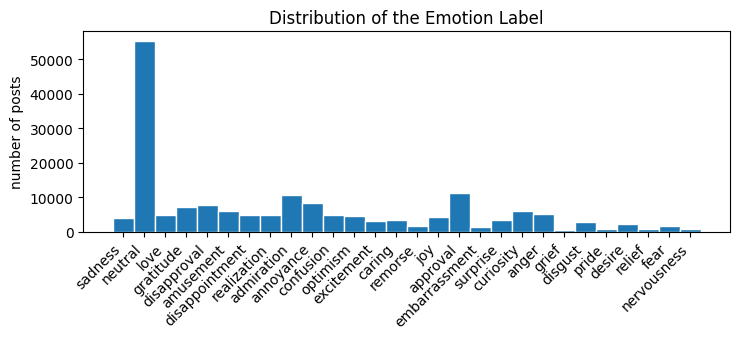

/home/n_thekie/Desktop/school/comp 472/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


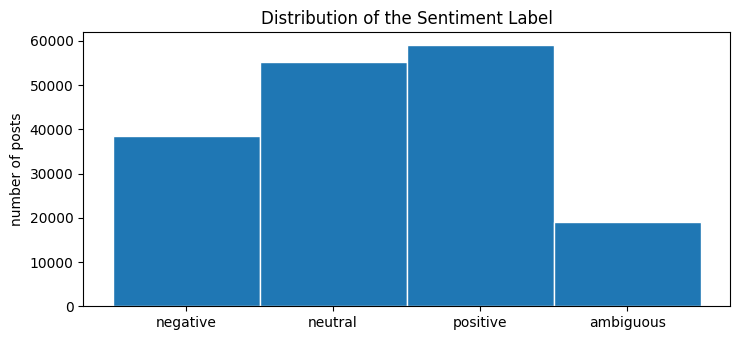

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.hist(emotions, bins=range(29), align="left", ec="white")
plt.xticks(rotation=45, ha="right")
plt.ylabel("number of posts")
plt.title("Distribution of the Emotion Label")
plt.savefig("emotion.pdf", format="pdf")
plt.show()
plt.ylabel("number of posts")
plt.hist(sentiments, bins=range(5), align="left", ec="white")
plt.title("Distribution of the Sentiment Label")
plt.savefig("sentiment.pdf", format="pdf")
plt.show()

In [5]:
# 2.1. Vectorizer
vectorizer = CountVectorizer()

In [6]:
text_dataset = vectorizer.fit_transform(posts)

In [7]:
"""
each column in the feature vector refers to a word/token.
each row in the feature vector is a post.
if said post uses a word in the vectorizer's vocabulary exactly once, then it will be shown as a 1
in the corresponding index of the vectorizer's vocabulary.
therefore, adding up the column for each column will give you the frequency of each word
"""
def word_frequencies(dataset, vocabulary):
    #add up the elements in the column for each column
    frequencies = dataset.sum(axis=0).tolist()[0]
    
    #add up the list of frequencies to get total size of words
    total_sum = np.asarray(frequencies).sum()
    
    #get words from feature vector
    words = vocabulary.keys()
    
    #get corresponding indices for words in feature vector
    indices = vocabulary.values()
    
    #since indices is a list of indices for the words at a 1:1 index, then we just map the frequencies value to the index
    #in the indices list and we get a list of sums that map to words list 1:1
    frequencies = list(map(lambda index: frequencies[index], indices))
    
    #then just zip words list and frequencies list as a dictionary
    return dict(zip(words, frequencies)), total_sum

In [8]:
frequencies, total_sum = word_frequencies(text_dataset, vectorizer.vocabulary_)

In [9]:
frequencies

{'that': 37748,
 'game': 2323,
 'hurt': 469,
 'you': 42828,
 'do': 7370,
 'right': 3492,
 'if': 9684,
 'don': 8528,
 'care': 903,
 'then': 3460,
 'fuck': 1452,
 'em': 216,
 'man': 2955,
 'love': 5703,
 'reddit': 872,
 'name': 31843,
 'was': 15008,
 'nowhere': 71,
 'near': 229,
 'them': 5185,
 'he': 13361,
 'by': 3780,
 'the': 71411,
 'falcon': 9,
 'considering': 261,
 'it': 41895,
 'such': 1108,
 'an': 5780,
 'important': 343,
 'document': 26,
 'should': 3191,
 'know': 5592,
 'damned': 50,
 'thing': 2787,
 'backwards': 47,
 'and': 34790,
 'forwards': 16,
 'thanks': 3269,
 'again': 1337,
 'for': 21087,
 'help': 1363,
 'isn': 1836,
 'as': 8490,
 'big': 1190,
 'but': 13752,
 'still': 3662,
 'quite': 441,
 'popular': 119,
 've': 4431,
 'heard': 806,
 'same': 2670,
 'about': 7816,
 'his': 5074,
 'content': 155,
 'never': 3319,
 'watched': 303,
 'him': 4999,
 'much': 3644,
 'crazy': 694,
 'went': 845,
 'to': 49931,
 'super': 709,
 'religion': 574,
 'high': 787,
 'school': 765,
 'think': 5864

In [10]:
total_sum

2048717

In [11]:
# 2.2 Splitting the dataset
json_file = np.asarray(json_file)
training_set, test_set = train_test_split(json_file,train_size=0.8)
training = {}
test = {}

# training dict
training["posts"] = training_set[:,0]
training["emotions"] = training_set[:,1]
training["sentiments"] = training_set[:,2]

# test dict
test["posts"] = test_set[:,0]
test["emotions"] = test_set[:,1]
test["sentiments"] = test_set[:,2]

In [12]:
# ------ Decision Tree --------
# part 1: Emotion classification
dt_vectorized_posts = vectorizer.transform(training["posts"])
dt_frequencies, total_sum = word_frequencies(dt_vectorized_posts, vectorizer.vocabulary_)

In [13]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()  
dtc.fit(dt_vectorized_posts, training["emotions"]) 

DecisionTreeClassifier()

In [14]:
vectorized_test_posts = vectorizer.transform(test["posts"])

In [15]:
predicted_Y = dtc.predict(vectorized_test_posts)

In [16]:
score = dtc.score(vectorized_test_posts,test["emotions"])
print(score)

0.35694331276917707


/home/n_thekie/Desktop/school/comp 472/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


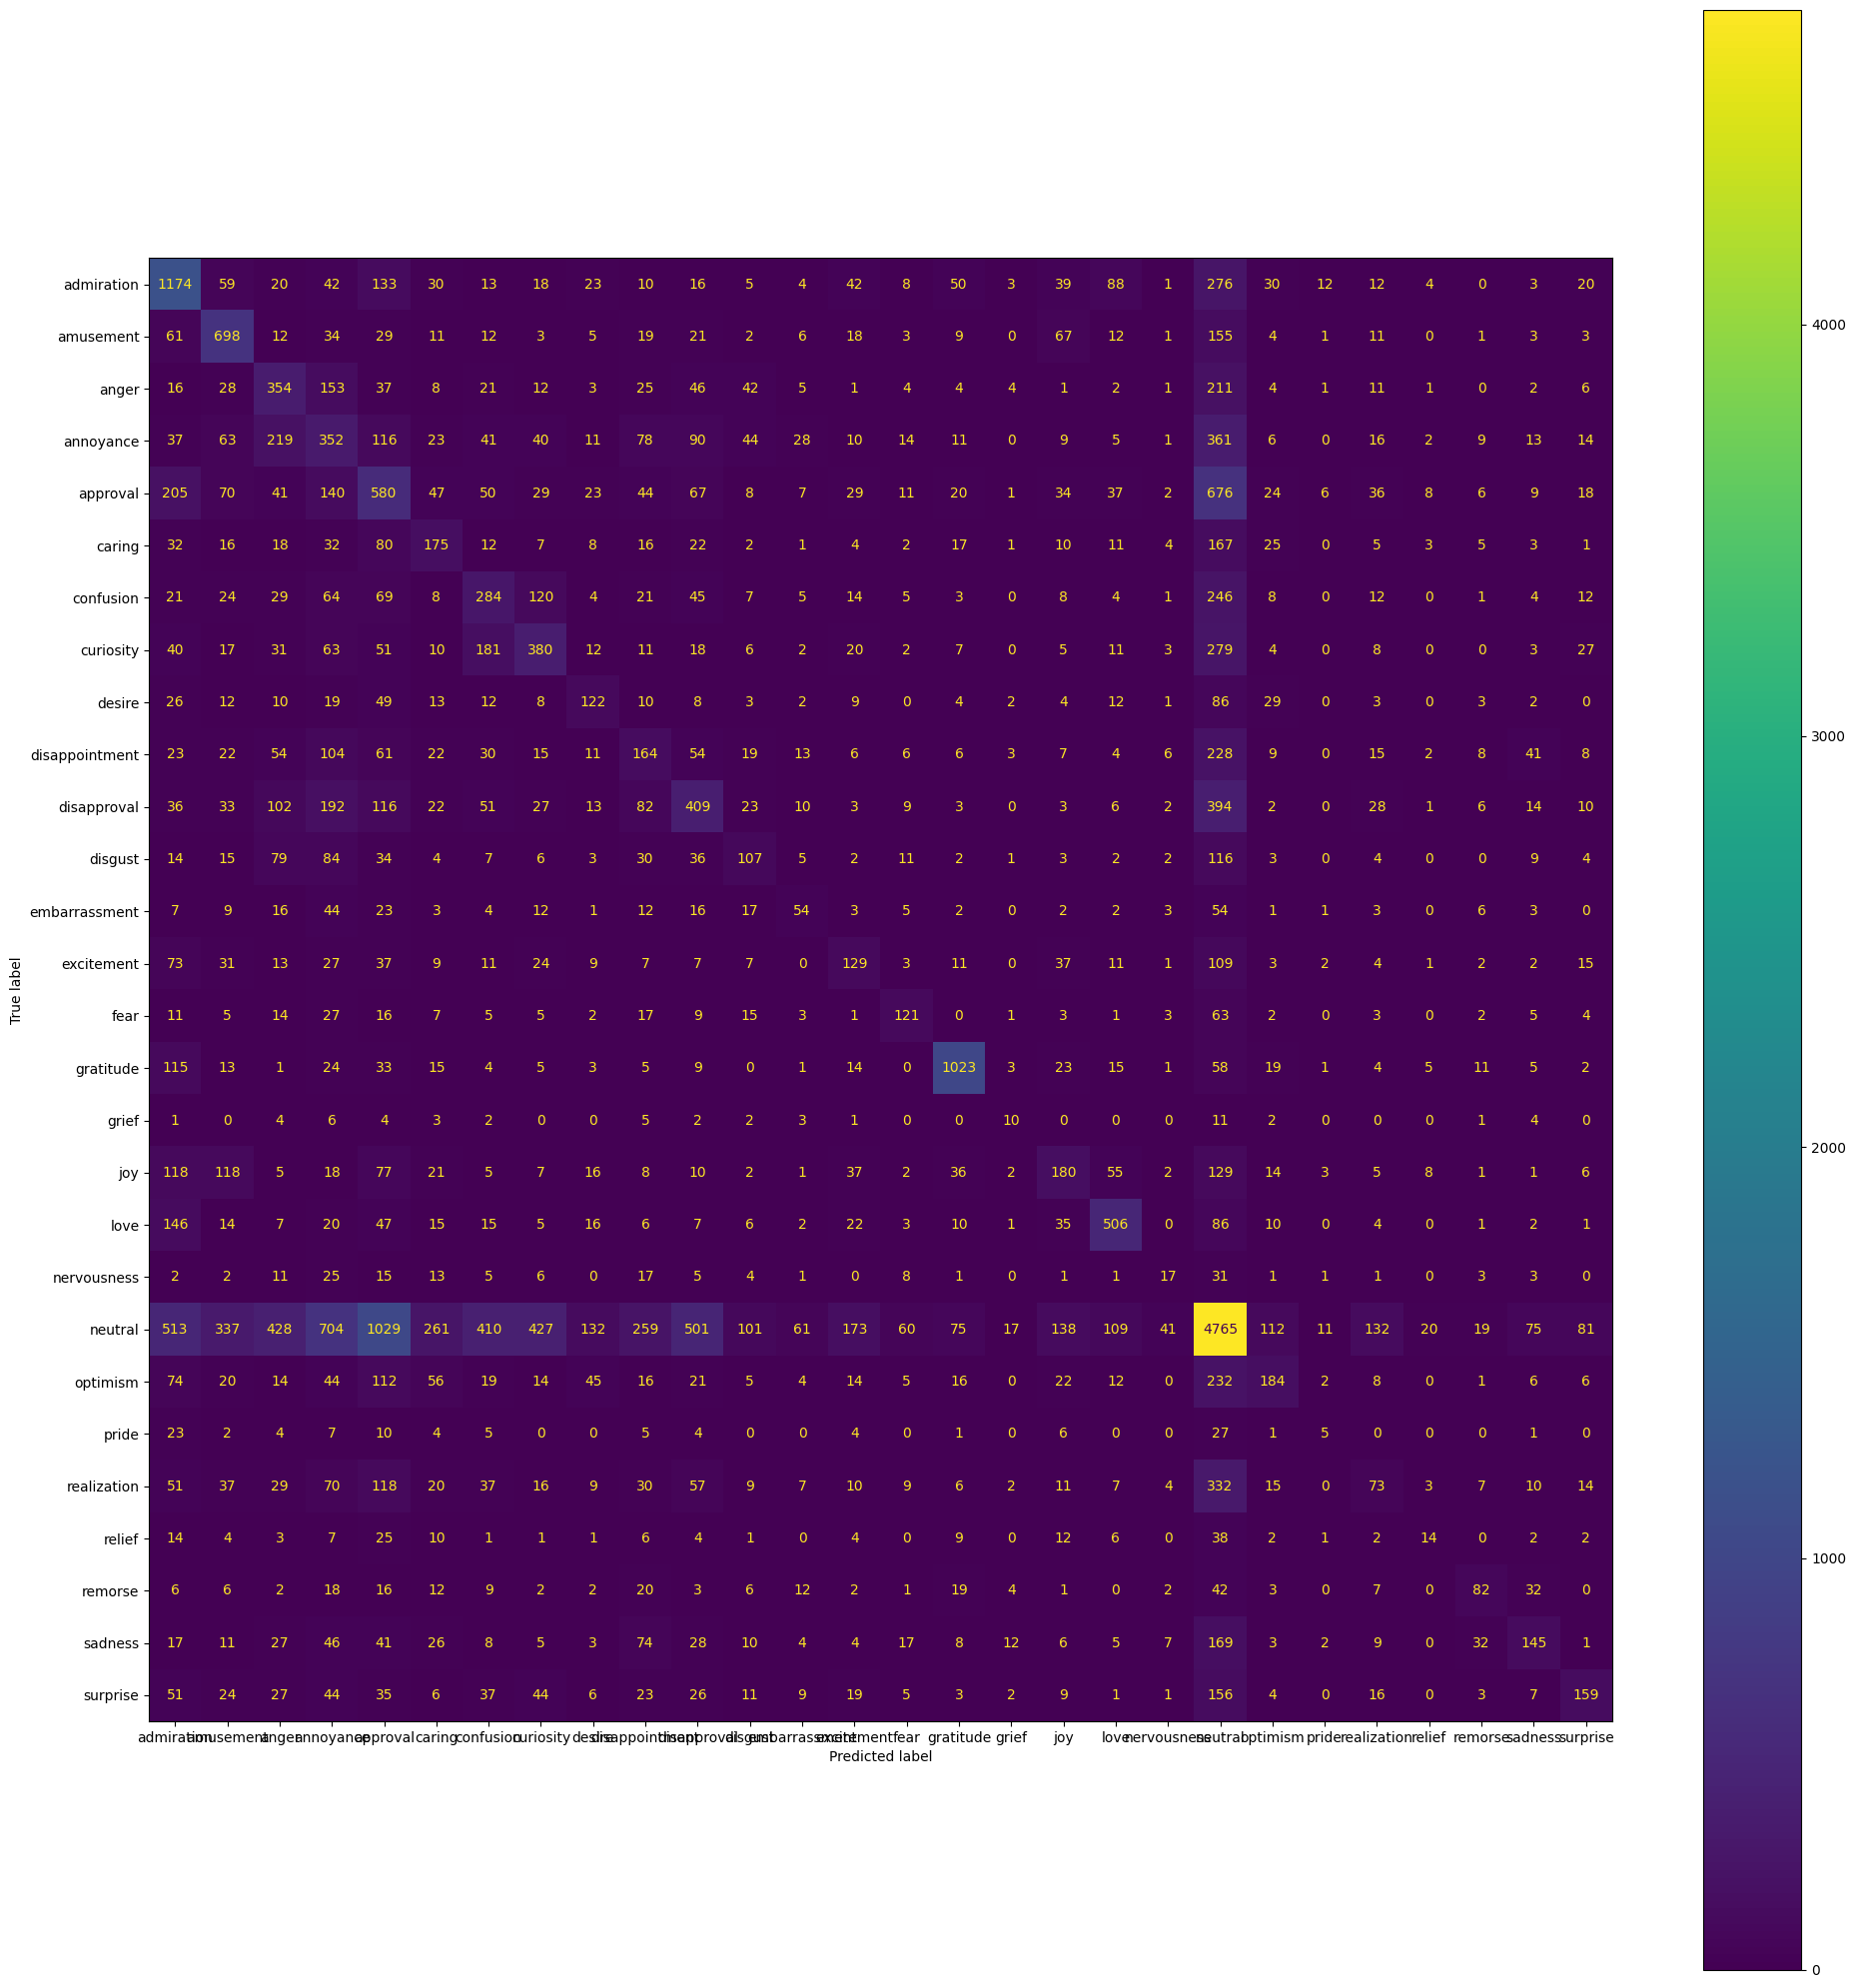

In [18]:
# Base-DT, no params, Emotion classification
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
metrics.ConfusionMatrixDisplay.from_predictions(test["emotions"],predicted_Y)
plt.savefig("Base-DT-Emotion-confusion-matrix.pdf", format="pdf")
plt.show()

In [19]:
# F1 - score
base_dt_f1_dict = metrics.classification_report(test["emotions"],predicted_Y, output_dict = True)

In [20]:
base_dt_f1_dict

{'admiration': {'precision': 0.40385276917784657,
  'recall': 0.5498829039812646,
  'f1-score': 0.46568821896072987,
  'support': 2135},
 'amusement': {'precision': 0.41301775147928993,
  'recall': 0.5811823480432973,
  'f1-score': 0.4828778969214805,
  'support': 1201},
 'anger': {'precision': 0.22490470139771285,
  'recall': 0.35294117647058826,
  'f1-score': 0.27473806752037255,
  'support': 1003},
 'annoyance': {'precision': 0.14605809128630706,
  'recall': 0.21822690638561687,
  'f1-score': 0.17499378573204077,
  'support': 1613},
 'approval': {'precision': 0.19378549949883062,
  'recall': 0.26032315978456017,
  'f1-score': 0.22217965906914386,
  'support': 2228},
 'caring': {'precision': 0.20491803278688525,
  'recall': 0.25773195876288657,
  'f1-score': 0.228310502283105,
  'support': 679},
 'confusion': {'precision': 0.21998450813323006,
  'recall': 0.2787046123650638,
  'f1-score': 0.2458874458874459,
  'support': 1019},
 'curiosity': {'precision': 0.3069466882067851,
  'recal

In [21]:
# part 2: Sentiments classification
# Re-train for sentiments
dtc.fit(dt_vectorized_posts, training["sentiments"]) 

DecisionTreeClassifier()

/home/n_thekie/Desktop/school/comp 472/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


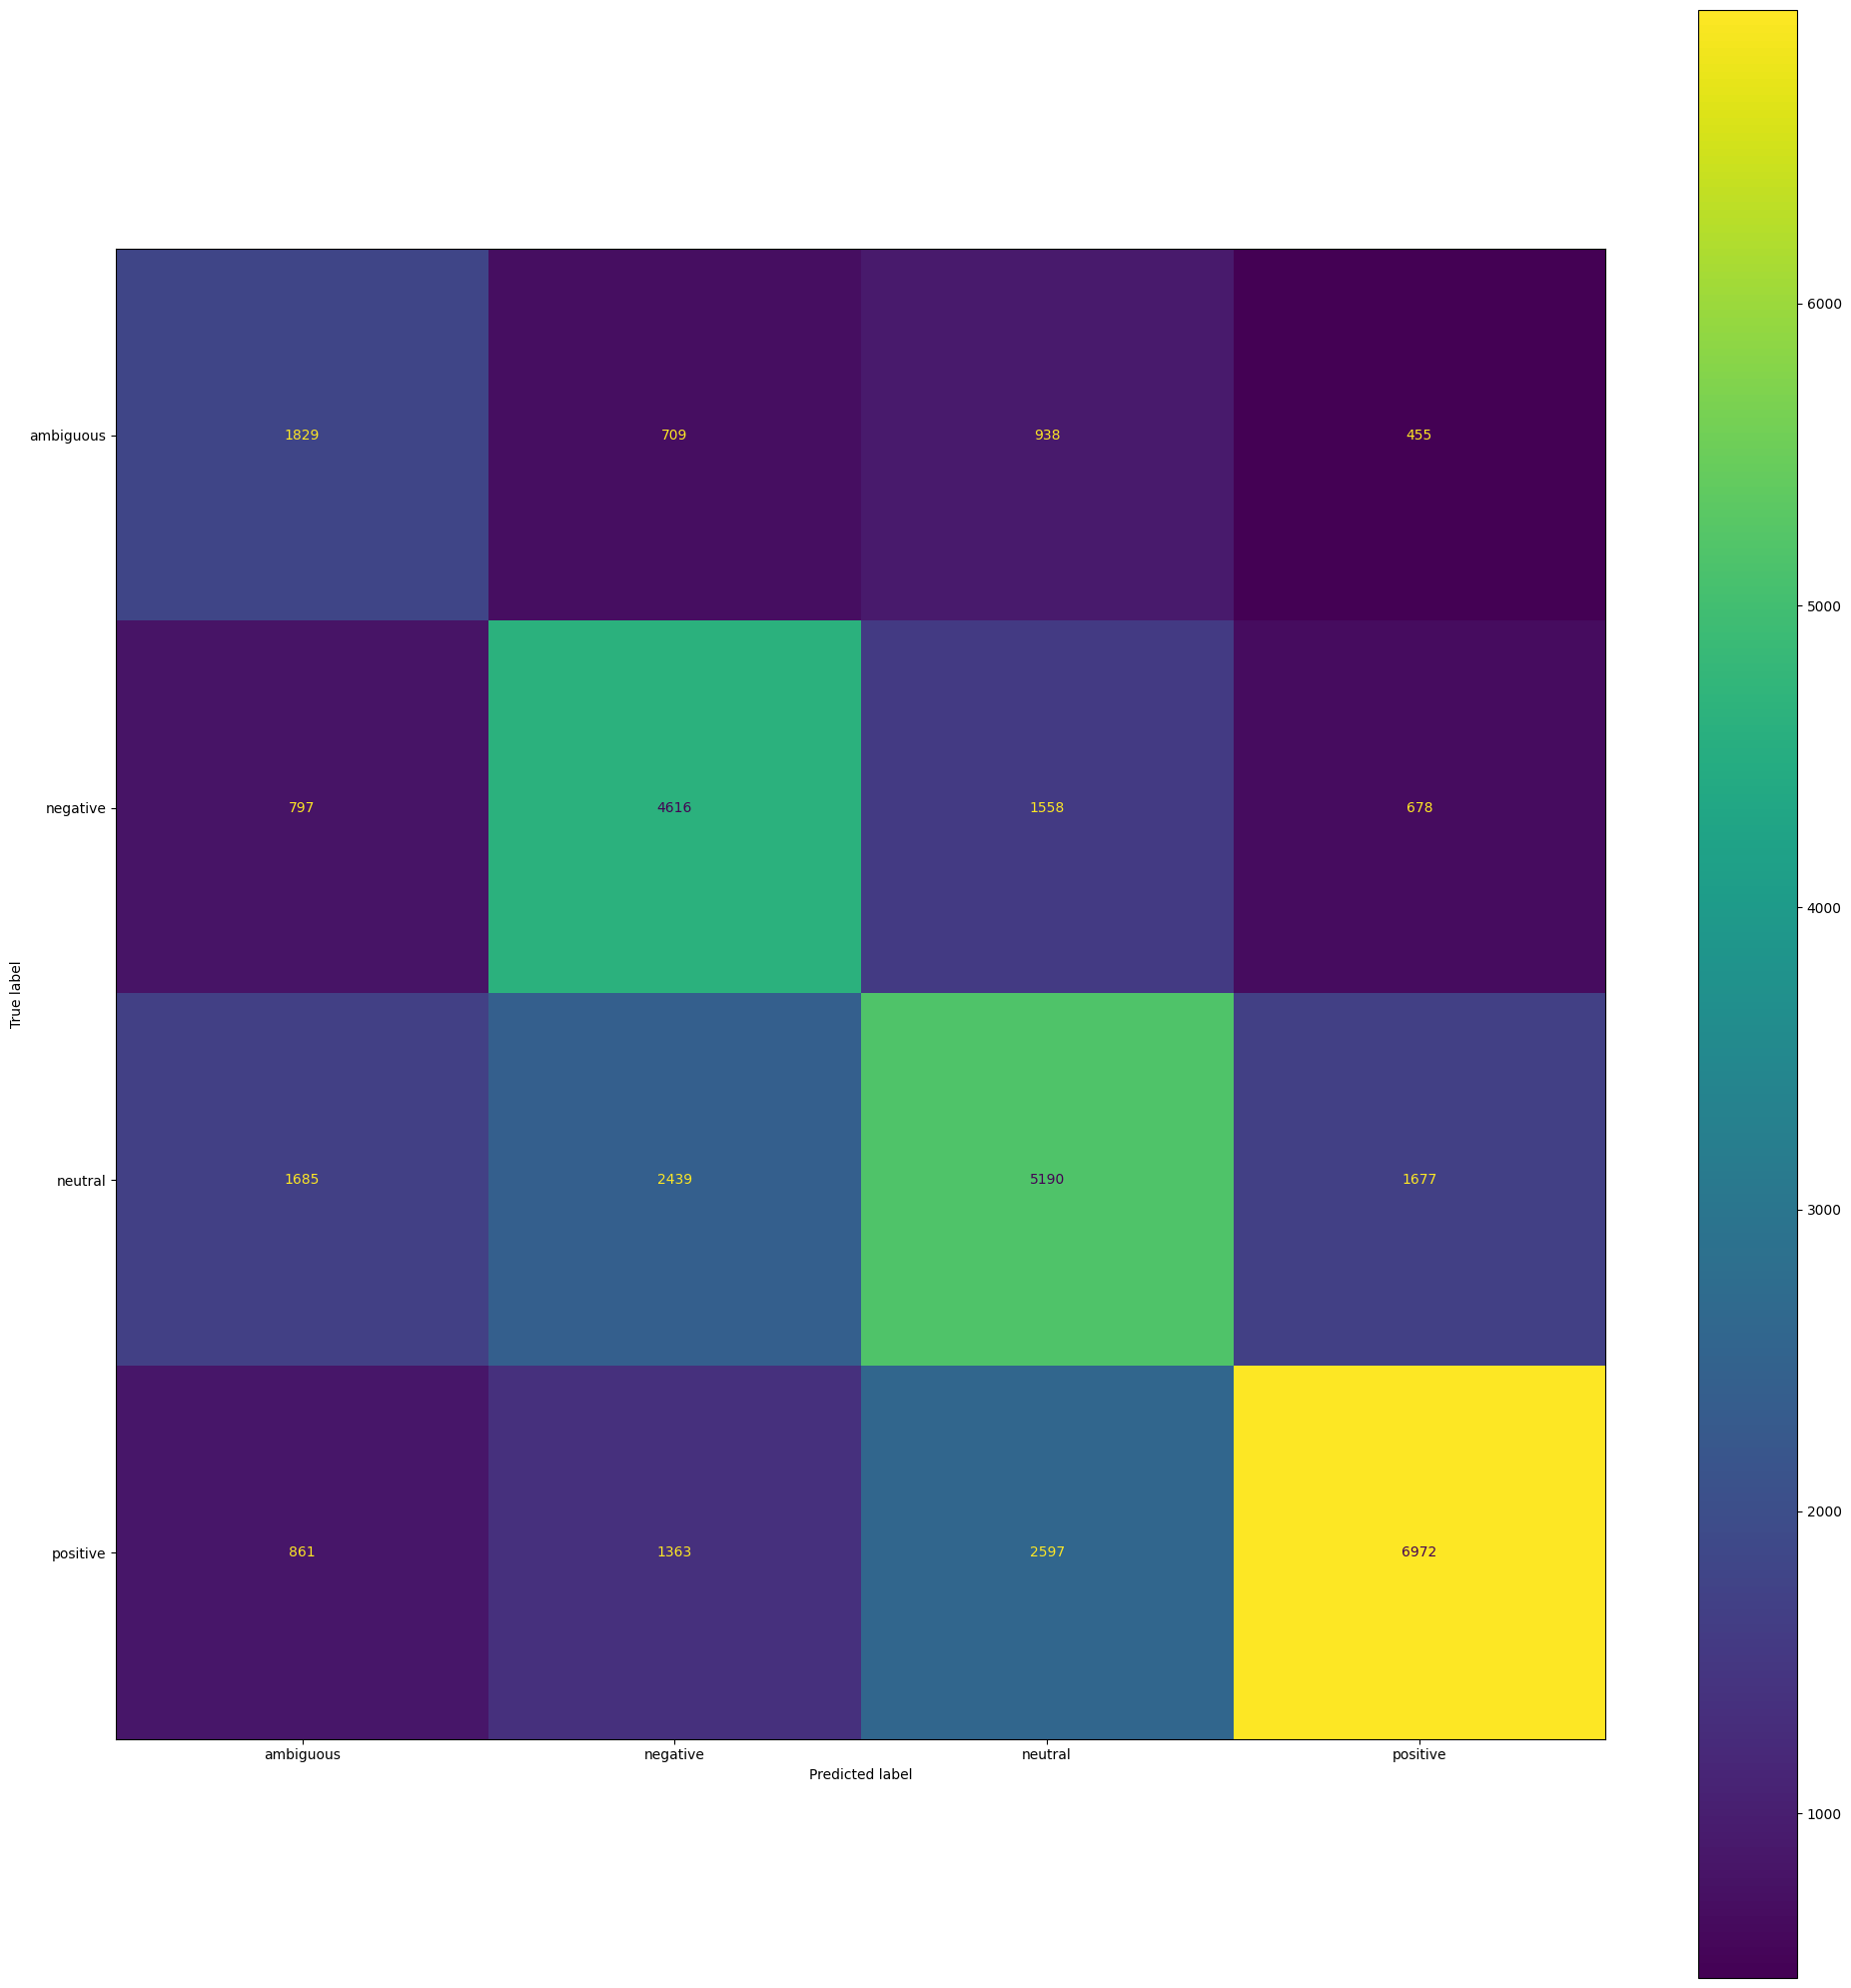

In [22]:
predicted_sentiments_Y = dtc.predict(vectorized_test_posts)

# Base-DT, no params, Sentiment classification
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
metrics.ConfusionMatrixDisplay.from_predictions(test["sentiments"],predicted_sentiments_Y)
plt.savefig("Base-DT-Sentiments-confusion-matrix.pdf", format="pdf")
plt.show()

In [26]:
# F1 - score
base_dt_sentiment_f1_dict = metrics.classification_report(test["sentiments"],predicted_sentiments_Y, output_dict = True)

In [27]:
base_dt_sentiment_f1_dict

{'ambiguous': {'precision': 0.35363495746326373,
  'recall': 0.46527601119308065,
  'f1-score': 0.40184554542458534,
  'support': 3931},
 'negative': {'precision': 0.5057521639092801,
  'recall': 0.6034775787684664,
  'f1-score': 0.5503099666189796,
  'support': 7649},
 'neutral': {'precision': 0.5047165224156375,
  'recall': 0.4722045309798926,
  'f1-score': 0.4879195261821942,
  'support': 10991},
 'positive': {'precision': 0.712737681455735,
  'recall': 0.591198168404986,
  'f1-score': 0.6463035921205098,
  'support': 11793},
 'accuracy': 0.5414678151553952,
 'macro avg': {'precision': 0.5192103313109792,
  'recall': 0.5330390723366064,
  'f1-score': 0.5215946575865673,
  'support': 34364},
 'weighted avg': {'precision': 0.5590528487605613,
  'recall': 0.5414678151553952,
  'f1-score': 0.5463146766348006,
  'support': 34364}}

In [ ]:
# TOP-DT
# Part 1: Emotions

from sklearn import tree
dtc = tree.DecisionTreeClassifier()  
dtc.fit(dt_vectorized_posts, training["emotions"]) 